In [25]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score


warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("credit_scoring.csv", sep=';')
data


,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4370,1.0,1.0,60.0,39.0,0.0,1.0,0.0,69.0,92.0,0.0,0.0,900.0,1020.0,0
4371,22.0,0.0,60.0,46.0,0.0,1.0,0.0,60.0,75.0,3000.0,600.0,950.0,1263.0,1
4372,0.0,0.0,24.0,37.0,0.0,1.0,1.0,60.0,90.0,3500.0,0.0,500.0,963.0,0
4373,0.0,1.0,48.0,23.0,1.0,1.0,1.0,49.0,140.0,0.0,0.0,550.0,550.0,1


In [3]:
# On separe les labels des features en deux tableau differents 
features = data.iloc[:, 0:13].values
features
label = data.iloc[:, 13].values
features

array([[   9.,    1.,   60., ...,    0.,  800.,  846.],
       [  17.,    1.,   60., ...,    0., 1000., 1658.],
       [  10.,    0.,   36., ...,    0., 2000., 2985.],
       ...,
       [   0.,    0.,   24., ...,    0.,  500.,  963.],
       [   0.,    1.,   48., ...,    0.,  550.,  550.],
       [   5.,    0.,   60., ..., 1000., 1350., 1650.]])

In [4]:
# on analyse nos deux tableau
label.shape
#(4375, 1)

features.shape

(4375, 13)

In [5]:
#on compte le pourcentage d'exemple' positif et negatif
np.unique(label, return_counts=True)
# 1216/4375 = 0.27794285714% occurence de 0, 3159/4375 = 0.72205714285% occurences de 1 

(array([0, 1]), array([1216, 3159]))

In [6]:
#on separe le tableau à 50% et on le distribue les valeurs aleatoirement dans 4 tableau
features_train, features_test, label_train, label_test = train_test_split(features, label, test_size = 0.5, random_state = 1)
features_train

array([[   2.,    1.,   48., ...,    0., 1100., 1464.],
       [  15.,    0.,   24., ...,    0.,  590., 1793.],
       [   1.,    1.,   48., ...,    0., 1300., 1533.],
       ...,
       [  11.,    1.,   12., ...,    0.,  300., 1479.],
       [   0.,    1.,   48., ...,    0.,  600., 1452.],
       [   1.,    1.,   36., ...,    0., 1200., 2186.]])

In [7]:
def classifier (features_train, features_test, label_train, label_test) :
    # ARBE CART
    DT = DecisionTreeClassifier(random_state = 1)
    DT.fit(features_train, label_train)
    labels_DT = DT.predict(features_test)

    #neigbors classifier/ K plus proches voisin
    NC = KNeighborsClassifier( n_neighbors=5)
    NC.fit(features_train, label_train)
    labels_NC = NC.predict(features_test)

    #Multilayer perceptron
    MP = MLPClassifier(random_state=1, hidden_layer_sizes=(40, 20))
    MP.fit(features_train, label_train)
    labels_MP = MP.predict(features_test)

    #on a maintenant les 3 labels issus des algorithmes demandé, onverifie les resultats
    accuracy_DT = accuracy_score(label_test, labels_DT)
    accuracy_NC = accuracy_score(label_test, labels_NC)
    accuracy_MP = accuracy_score(label_test, labels_MP)

    print("Accuracy : ")
    print("decision tree "+ str(accuracy_DT))
    print("neigbors classifier : "+ str(accuracy_NC))
    print("Multilayer perceptron : "+ str(accuracy_MP))
    
    print("\n")

    #il semblerait qu'avec le multiyaer perceptron on a un meilleur accuracy *

    #la meilleur option est d'utiliser la precision car on souhaite une estimation sur l'exactitude 
    # de toutes les informations, pour des données medicales on aurait pris le rappel par exemple
    precision_DT = precision_score(label_test, labels_DT)
    precision_NC = precision_score(label_test, labels_NC)
    precision_MP = precision_score(label_test, labels_MP)
    
    print("Precision : ")
    print("decision tree "+ str(precision_DT))
    print("neigbors classifier : "+ str(precision_NC))
    print("Multilayer perceptron : "+ str(precision_MP))

In [8]:
classifier(features_train, features_test, label_train, label_test) 

Accuracy : 
decision tree 0.7271480804387569
neigbors classifier : 0.7248628884826326
Multilayer perceptron : 0.7404021937842779


Precision : 
decision tree 0.8194174757281554
neigbors classifier : 0.7709713024282561
Multilayer perceptron : 0.7995283018867925


## accuracy normalized :

DT : 0.7262340036563071 ; 
NC : 0.7541133455210237 ;
MP : 0.7819926873857403 ;

## precision normalized: ;

DT : 0.8200129954515919 ;
NC : 0.8094674556213017 ;
MP : 0.8397790055248618 ;

In [9]:
# QUESTION 3 : refaire tout le script avec les données normalisées
data
# On separe les labels des features en deux tableau differents 
features = data.iloc[:, 0:13].values
features
label = data.iloc[:, 13].values

#on normalise les données
scaler = StandardScaler()
scaler.fit(features_train)
features_train_norm = scaler.transform(features_train)
features_test_norm = scaler.transform(features_test)


classifier(features_train_norm, features_test_norm, label_train, label_test) 

#il semblerait que le multilayer perceptron ait de meilleur resultats une fois les données normalisé car 
#on a une meilleur distribution ( le mlp aura moins de mal à franchier la barriere de decision ) 
# des données apres normalisation.



Accuracy : 
decision tree 0.7271480804387569
neigbors classifier : 0.7527422303473492
Multilayer perceptron : 0.776508226691042


Precision : 
decision tree 0.8181818181818182
neigbors classifier : 0.8106015485407981
Multilayer perceptron : 0.8381717109326745


In [10]:
#QUESTION 4
#on applique le pca à nos données
pca = PCA(n_components= 3)
pca.fit(features_train_norm)
features_train_pca = pca.transform(features_train_norm)
features_test_pca = pca.transform(features_test_norm)

# on a un tableau concatene avec 15 valeurs par ligne
features_train_concat = np.concatenate ((features_train_norm, features_train_pca) , axis = 1)
features_test_concat = np.concatenate ((features_test_norm, features_test_pca) , axis = 1)
classifier(features_train_concat, features_test_concat, label_train, label_test) 



Accuracy : 
decision tree 0.7362888482632541
neigbors classifier : 0.756398537477148
Multilayer perceptron : 0.770109689213894


Precision : 
decision tree 0.8327825512227363
neigbors classifier : 0.8103957471943296
Multilayer perceptron : 0.8269812462189957


Index(['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses',
       'Records', 'Time', 'Job', 'Debt', 'Home', 'Marital'],
      dtype='object')


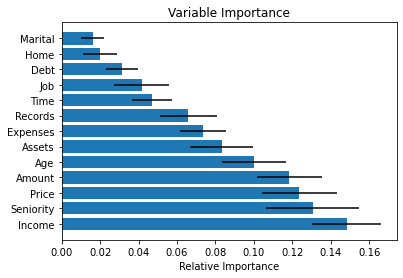

In [11]:
# Question 5

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(features_train_norm, label_train)
importances=clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = data.columns[:-1]
print(features[sorted_idx])
padding = np.arange(features_train_norm.size/len(features_train_norm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

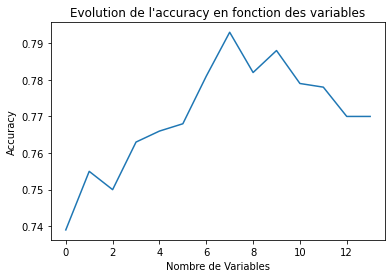

In [12]:
MP = MLPClassifier(random_state=1, hidden_layer_sizes=(40, 20)) 
scores=np.zeros(features_train_norm.shape[1]+1)
for f in np.arange(0, features_test_norm.shape[1]+1):
 X1_f = features_train_norm[:,sorted_idx[:f+1]]
 X2_f = features_test_norm [:,sorted_idx[:f+1]]
 MP.fit(X1_f,label_train)
 YMP=MP.predict(X2_f)
 scores[f]=np.round(accuracy_score(label_test,YMP),3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()


#Il semblerait d'apres les resultats qu'il faudrait prendre 7 variables pour que l'accuracy soit maximale

In [13]:
#question 6 : tuner les parametres de l'algorithme MLP
# on normalise les données une nouvelle fois en prenant les variables les plus importantes
X = data.drop('Status', axis=1)
X = X.loc[:, ['Income', 'Seniority', 'Price', 'Amount', 'Age', 'Assets', 'Expenses']]

x_train, x_test, y_train, y_test = train_test_split(X, label, train_size = 0.5, random_state = 1) 

scalerX_train = scaler.fit_transform(x_train)
scalerX_test = scaler.transform(x_test)

MLPC = MLPClassifier(random_state=1)


In [14]:
#on utilisz ensuite GridSearchCv pour obtenir les meilleurs parametres 

parameter_space = {
    'hidden_layer_sizes': [(7, 4),(15, 5), (8,5), (50, 10), (40, 20), (12,6)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],

}
grid = GridSearchCV(MP, parameter_space, n_jobs=-1, cv=5)
grid.fit(scalerX_train, y_train)
grid.best_params_

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multi

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (7, 4),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [15]:
#question 7 : on construit un pipeline qui regroupe les etapes precedentes 

pipe = Pipeline([('scaler', StandardScaler()),
                 ('MLP', MLPClassifier(activation= 'relu',
                     alpha= 0.05,
                     hidden_layer_sizes= (7, 4),
                     learning_rate= 'constant',
                     solver= 'adam' ,random_state=1))])


In [17]:
#on stocke le pipe dans un pickle
joblib.dump(pipe, 'pipe_normalized_mlp.pkl')

['pipe_normalized_mlp.pkl']

In [20]:
#on test le pickle
new_pipe = joblib.load('pipe_normalized_mlp.pkl')
pipe.fit(x_train, y_train)

y_predicted = pipe.predict(x_test)
print("accuracy score :", accuracy_score( y_test, y_predicted ))
print("precision score :", precision_score(y_test, y_predicted ))

accuracy score : 0.770109689213894
precision score : 0.8004446914952752


In [28]:
#question 8 : tous les algorithmes demandés en plus de leur accuracy
#quel type de donné utilisés , normaisé , avec 7 variables ????
#x_train, x_test, y_train, y_test = train_test_split(X, label, train_size = 0.5, random_state = 1) 

# multilayer perceptron
mlp = MLPClassifier(hidden_layer_sizes=(20,10))
mlp.fit(x_train, y_train)
y_mlp = mlp.predict(x_test)
a_mlp = accuracy_score(y_test, y_mlp)
ra_mlp = roc_auc_score(y_test, y_mlp)

print("accuracy multilayer perceptron: ", a_mlp)
print("roc_auc_score multilayer perceptron: ", ra_mlp)
print('\n')

# ARBE CART
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(x_train, y_train)
y_dt = dt.predict(x_test)
a_dt = accuracy_score(y_test, y_dt)
ra_dt = roc_auc_score(y_test, y_dt)

print("accuracy ARBE CART : ", a_dt)
print("roc_auc_score ARBE CART : ", ra_dt)
print('\n')

# K plus proches voisins / neigbors classifier
nc = KNeighborsClassifier(n_neighbors=5)
nc.fit(x_train, y_train)
y_nc = nc.predict(x_test)
a_nc = accuracy_score(y_test, y_nc)
ra_nc = roc_auc_score(y_test, y_nc)

print("accuracy K plus proches voisins: ", a_nc)
print("roc_auc_score K plus proches voisins: ", ra_nc)
print('\n')

# AdaBoost classifier
ab = AdaBoostClassifier(n_estimators=200)
ab.fit(x_train, y_train)
y_ab = ab.predict(x_test)
a_ab = accuracy_score(y_test, y_ab)
ra_ab = roc_auc_score(y_test, y_ab)

print("accuracy AdaBoost classifier: ", a_ab)
print("roc_auc_score AdaBoost classifier: ", ra_ab)
print('\n')

#bagging classifier
bc = BaggingClassifier(n_estimators=200)
bc.fit(x_train, y_train)
y_bc = bc.predict(x_test)
a_bc = accuracy_score(y_test, y_bc)
ra_bc = roc_auc_score(y_test, y_bc)

print("accuracy bagging classifier: ", a_bc)
print("roc_auc_score bagging classifier: ", ra_bc)
print('\n')

# Random forest
rf = RandomForestClassifier(n_estimators=200)
rf.fit(x_train, y_train)
y_rf = rf.predict(x_test)
a_rf = accuracy_score(y_test, y_rf)
ra_rf = roc_auc_score(y_test, y_rf)

print("accuracy Random forest: ", a_rf)
print("roc_auc_score Random forest: ", ra_rf)
print('\n')

#arbre id3
id3 = DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='best')
id3.fit(x_train , y_train)
y_id3 = id3.predict(x_test)
a_id3 = accuracy_score(y_test, y_id3)
ra_id3 = roc_auc_score(y_test, y_id3)

print("accuracy arbre id3: ", a_id3)
print("roc_auc_score arbre id3: ", ra_id3)
print('\n')

#decision tree stump
dts = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dts.fit(x_train, y_train)
y_dts = dts.predict(x_test)
a_dts = accuracy_score(y_test, y_dts)
ra_dts = roc_auc_score(y_test, y_dts)

print("accuracy decision tree stump: ", a_dts)
print("roc_auc_score decision tree stump: ", ra_dts)
print('\n')

# naive baye simple
nb = GaussianNB()
nb.fit(x_train, y_train)
y_nb = nb.predict(x_test)
a_nb = accuracy_score(y_test, y_nb)
ra_nb = roc_auc_score(y_test, y_nb)

print("accuracy naive baye simple: ", a_nb)
print("roc_auc_score naive baye simple: ", ra_nb)
print('\n')


#accuracy for each 

accuracy multilayer perceptron:  0.7554844606946983
roc_auc_score multilayer perceptron:  0.6073106896782394


accuracy ARBE CART :  0.7120658135283364
roc_auc_score ARBE CART :  0.640830908421968


accuracy K plus proches voisins:  0.7257769652650823
roc_auc_score K plus proches voisins:  0.5914024349454814


accuracy AdaBoost classifier:  0.7554844606946983
roc_auc_score AdaBoost classifier:  0.651868436015787


accuracy bagging classifier:  0.7591407678244972
roc_auc_score bagging classifier:  0.6605395845875979


accuracy Random forest:  0.7632541133455211
roc_auc_score Random forest:  0.656210281624189


accuracy arbre id3:  0.7408592321755028
roc_auc_score arbre id3:  0.6407431099070172


accuracy decision tree stump:  0.7239488117001828
roc_auc_score decision tree stump:  0.5


accuracy naive baye simple:  0.7591407678244972
roc_auc_score naive baye simple:  0.6467113184828417


